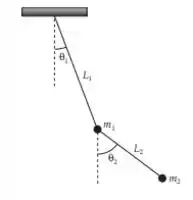

In [31]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

sp.init_printing()

t,g,m1,m2,L1,L2, = sp.symbols('t,g,m1,m2,L1,L2')

the1, the2 = sp.symbols(r'\theta_1, \theta_2')  ### para theta ficar na formatação grega

the1 = sp.Function(the1)(t)
the2 = sp.Function(the2)(t)

In [32]:
##derivadas primeiras e segundas

dthe1 = sp.diff(the1, t)
dthe2 = sp.diff(the2, t)
d2the1 = sp.diff(dthe1, t)
d2the2 = sp.diff(dthe2, t)


In [ ]:
dthe1

d             
──(\theta₁(t))
dt            

In [ ]:
dthe2

d             
──(\theta₂(t))
dt            

In [ ]:
d2the1

  2            
 d             
───(\theta₁(t))
  2            
dt             

In [ ]:
d2the2

  2            
 d             
───(\theta₂(t))
  2            
dt             

In [33]:
##definir as posiçoes das massas x1,y1,x2,y2

x1 = L1*sp.sin(the1)
y1 = -L1*sp.cos(the1)
x2 = L1*sp.sin(the1)+L2*sp.sin(the2)
y2 = -L1*sp.cos(the1)-L2*sp.cos(the2)


In [34]:
##obter a lagrangeana a partir da energia cinetica e pot gravitacional

# energia cinética

K1 = 1/2 * m1 * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2) # k= 1/2 mv**2 , dx/dt= v
K2 = 1/2 * m2 * (sp.diff(x2, t)**2 + sp.diff(y2, t)**2)
K = K1+K2

# energia potencial gravitacional

Pg1 = m1*g*y1
Pg2 = m2*g*y2
PG = Pg1 + Pg2

# lagrangeana

L = K - PG

L


                                                                              
                                                                              
L₁⋅g⋅m₁⋅cos(\theta₁(t)) - g⋅m₂⋅(-L₁⋅cos(\theta₁(t)) - L₂⋅cos(\theta₂(t))) + 0.
                                                                              

     ⎛                                     2                                  
     ⎜  2    2             ⎛d             ⎞      2    2             ⎛d        
5⋅m₁⋅⎜L₁ ⋅sin (\theta₁(t))⋅⎜──(\theta₁(t))⎟  + L₁ ⋅cos (\theta₁(t))⋅⎜──(\theta
     ⎝                     ⎝dt            ⎠                         ⎝dt       

      2⎞          ⎛                                                           
     ⎞ ⎟          ⎜⎛                   d                                   d  
₁(t))⎟ ⎟ + 0.5⋅m₂⋅⎜⎜L₁⋅sin(\theta₁(t))⋅──(\theta₁(t)) + L₂⋅sin(\theta₂(t))⋅──(
     ⎠ ⎠          ⎝⎝                   dt                                  dt 

            2                                    

Equaçao de lagrange
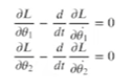

In [36]:
#obtendo as equaçoes de lagrange
EL1 = sp.diff(sp.diff(L, dthe1), t) - sp.diff(L, the1)
EL2 = sp.diff(sp.diff(L, dthe2), t) - sp.diff(L, the2)


In [37]:
EL1

                                                           ⎛                  
                                                           ⎜    2    2        
L₁⋅g⋅m₁⋅sin(\theta₁(t)) + L₁⋅g⋅m₂⋅sin(\theta₁(t)) + 0.5⋅m₁⋅⎜2⋅L₁ ⋅sin (\theta₁
                                                           ⎜                  
                                                           ⎝                  

       2                                        2            ⎞                
      d                    2    2              d             ⎟          ⎛     
(t))⋅───(\theta₁(t)) + 2⋅L₁ ⋅cos (\theta₁(t))⋅───(\theta₁(t))⎟ - 0.5⋅m₂⋅⎜2⋅L₁⋅
       2                                        2            ⎟          ⎝     
     dt                                       dt             ⎠                

                                                                              
⎛                   d                                   d             ⎞       
⎜L₁⋅sin(\theta₁(t))⋅──(\theta₁(t)) + L₂⋅sin(\theta

In [38]:
EL2

                                                                              
                                 ⎛     ⎛                   d                  
L₂⋅g⋅m₂⋅sin(\theta₂(t)) - 0.5⋅m₂⋅⎜2⋅L₂⋅⎜L₁⋅sin(\theta₁(t))⋅──(\theta₁(t)) + L₂
                                 ⎝     ⎝                   dt                 
                                                                              

                                                                              
                 d             ⎞                 d                     ⎛      
⋅sin(\theta₂(t))⋅──(\theta₂(t))⎟⋅cos(\theta₂(t))⋅──(\theta₂(t)) - 2⋅L₂⋅⎜L₁⋅cos
                 dt            ⎠                 dt                    ⎝      
                                                                              

                                                                              
             d                                   d             ⎞              
(\theta₁(t))⋅──(\theta₁(t)) + L₂⋅cos(\theta₂(t))⋅─

In [39]:
sol1 = sp.solve([EL1], (d2the1))
sol2 = sp.solve([EL2], (d2the2))

In [ ]:
sol1

⎧                                                                             
⎪                                                                             
⎪                                         L₂⋅m₂⋅sin(\theta₁(t))⋅sin(\theta₂(t)
⎪  2                                                                          
⎨ d                                                                           
⎪───(\theta₁(t)): - ──────────────────────────────────────────────────────────
⎪  2                         2                        2                       
⎪dt                 L₁⋅m₁⋅sin (\theta₁(t)) + L₁⋅m₁⋅cos (\theta₁(t)) + L₁⋅m₂⋅si
⎩                                                                             

    2                                                                         
   d                                                                          
)⋅───(\theta₂(t))                                                             
    2                                              

In [ ]:
sol2

⎧                                                        2                    
⎪                                                       d                     
⎪                   L₁⋅sin(\theta₁(t))⋅sin(\theta₂(t))⋅───(\theta₁(t))        
⎪  2                                                     2               L₁⋅si
⎨ d                                                    dt                     
⎪───(\theta₂(t)): - ────────────────────────────────────────────────── + ─────
⎪  2                          2                     2                         
⎪dt                     L₂⋅sin (\theta₂(t)) + L₂⋅cos (\theta₂(t))             
⎩                                                                             

                                                                              
                                              2                               
                              ⎛d             ⎞                                
n(\theta₁(t))⋅cos(\theta₂(t))⋅⎜──(\theta₁(t))⎟    L

In [40]:
#Resolver as equaçoes igual a 0

sol = sp.solve([EL1, EL2], (d2the1, d2the2))
sol


⎧                                                                             
⎪                                                                             
⎪  2                                                                          
⎨ d                                                                           
⎪───(\theta₁(t)): - ──────────────────────────────────────────────────────────
⎪  2                         2                2                        2      
⎩dt                 L₁⋅m₁⋅sin (\theta₁(t))⋅sin (\theta₂(t)) + L₁⋅m₁⋅sin (\thet

                                                                              
                                                                              
                                                                     L₁⋅m₂⋅sin
                                                                              
──────────────────────────────────────────────────────────────────────────────
          2                        2               

In [ ]:
## transformando 2 EDO's de segunda ordem  um sistema de 4 EDO's primeira ordem


$\frac{d^2\theta_1}{dt^2}$

$\frac{d^2\theta_2}{dt^2}$

transformado em

dz$_1$/dt

dΘ$_1$/dt= z1

dz$_2$/dt

dΘ$_ 2$/dt= z1


In [41]:
##Coverter simbolos por numeros por lambdificaçao

dz1dt_f = sp.lambdify((t,g,m1,m2,L1,L2,the1,the2,dthe1,dthe2), sol[d2the1])
dz2dt_f = sp.lambdify((t,g,m1,m2,L1,L2,the1,the2,dthe1,dthe2), sol[d2the2])
dthe1dt_f = sp.lambdify(dthe1, dthe1)
dthe2dt_f = sp.lambdify(dthe2, dthe2)

In [42]:
###função para as condições iniciais do probelma
def iniciais(I, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = I
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
    ]

In [43]:
t = np.linspace(0, 60, 1000) ### espaço de tempo (de 0 a 60 segundos, 1000 atualizações)
g = 9.81
m1= 1000
m2=1000
L1 = 1
L2 = 1

In [44]:
matriz = odeint(iniciais, y0=[8, 0, 5, 0], t=t, args=(g,m1,m2,L1,L2))
matriz

array([[ 8.00000000e+00,  0.00000000e+00,  5.00000000e+00,
         0.00000000e+00],
       [ 7.98215083e+00, -5.94053568e-01,  4.99931972e+00,
        -2.15158595e-02],
       [ 7.92876123e+00, -1.18172627e+00,  4.99776001e+00,
        -2.50670033e-02],
       ...,
       [ 5.51309860e+00, -9.72786827e-01, -4.06976405e+01,
         2.11715276e+00],
       [ 5.46655041e+00, -5.90496432e-01, -4.05594548e+01,
         2.47630670e+00],
       [ 5.44055845e+00, -2.88802916e-01, -4.04007558e+01,
         2.80694774e+00]])

In [45]:
matriz.T  #### como a matriz ficou thetha1, dtheta1, theta2, dthetha2 nas colunas, precisamos transpor pra conseguir pegar mais facilmente os resultados de cada coordenada e suas derivadas

array([[ 8.00000000e+00,  7.98215083e+00,  7.92876123e+00, ...,
         5.51309860e+00,  5.46655041e+00,  5.44055845e+00],
       [ 0.00000000e+00, -5.94053568e-01, -1.18172627e+00, ...,
        -9.72786827e-01, -5.90496432e-01, -2.88802916e-01],
       [ 5.00000000e+00,  4.99931972e+00,  4.99776001e+00, ...,
        -4.06976405e+01, -4.05594548e+01, -4.04007558e+01],
       [ 0.00000000e+00, -2.15158595e-02, -2.50670033e-02, ...,
         2.11715276e+00,  2.47630670e+00,  2.80694774e+00]])

In [46]:
the1 = matriz.T[0]
the2 = matriz.T[2]

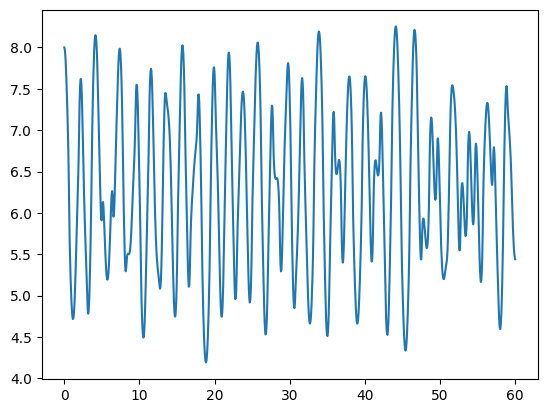

In [47]:
#### gráfico theta 1 x tempo
plt.plot(t, the1)

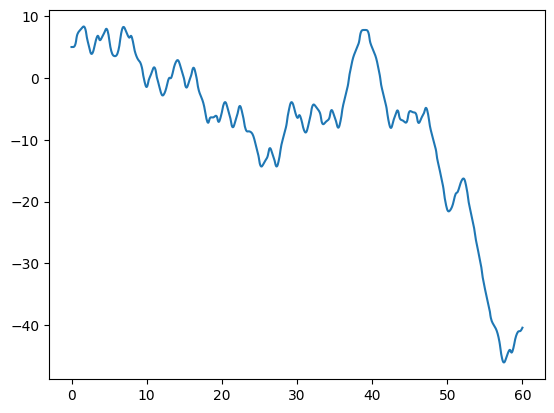

In [48]:
#### gráfico theta 2 x tempo
plt.plot(t, the2)

In [49]:
def coordenadas(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            -L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2))

x1, y1, x2, y2 = coordenadas(t, matriz.T[0], matriz.T[2], L1, L2)

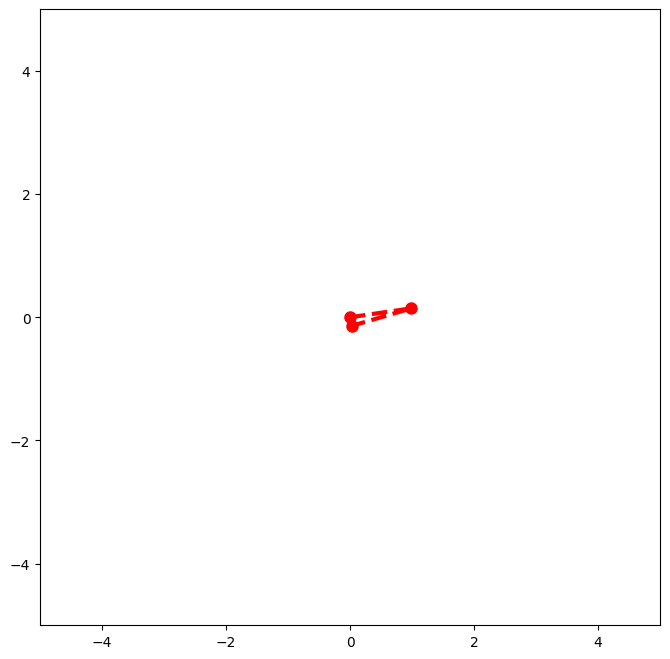

In [50]:
def gif(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])

fig, ax = plt.subplots(1,1, figsize=(8,8))
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ani = animation.FuncAnimation(fig, gif, frames=1000, interval=50)
ani.save('pendulo.gif',writer='pillow',fps=25)